# **Trabalho 1 - Modelos Lineares**

#**Grupo:**

*   Gabriel Calheias
*   Lucas Sá
*   Mateus Lima
*   Vitor Saraiva








Bibliotecas Utilizadas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

Iremos utilizar o seguinte dataset:
*   https://www.kaggle.com/datasets/iamsouravbanerjee/covid19-dataset-world-and-continent-wise?select=Covid+Data+-+South+America.csv

In [2]:
x = pd.read_csv("./CovidData-SouthAmerica.csv")
display(x)

,"Country, Other",Total Cases,Total Deaths,Total Recovered,Active Cases,Serious / Critical Condition,Total Cases / 1M Population,Deaths / 1M Population,Total Tests,Tests / 1M Population,Population
0,Brazil,"21,069,017","589,277","20,173,064","306,676","8,318","98,277","2,749","57,095,219","266,322","214,384,223"
1,Argentina,"5,234,851","114,101","5,087,120","33,630","1,614","114,557","2,497","24,252,818","530,737","45,696,487"
2,Colombia,"4,936,052","125,782","4,774,661","35,609",542,"95,776","2,441","24,920,135","483,534","51,537,524"
3,Peru,"2,164,380","198,891",NaN,NaN,"1,071","64,558","5,932","17,377,197","518,321","33,525,950"
4,Chile,"1,645,820","37,293","1,602,703","5,824",463,"85,212","1,931","21,081,270","1,091,483","19,314,333"
5,Ecuador,"505,860","32,559","443,880","29,421",759,"28,156","1,812","1,798,012","100,078","17,966,183"
6,Bolivia,"496,032","18,616","448,704","28,712",220,"41,806","1,569","2,349,096","197,983","11,865,122"
7,Paraguay,"459,524","16,120","441,169","2,235",40,"63,485","2,227","1,810,321","250,104","7,238,263"
8,Uruguay,"387,299","6,046","379,573","1,680",13,"111,029","1,733","3,480,276","997,706","3,488,277"
9,Venezuela,"352,055","4,261","336,034","11,760",681,"12,423",150,"3,359,014","118,532","28,338,512"


Serão utilizadas as colunas "Total Cases" e "Total Deaths"

In [3]:
dataset = pd.read_csv("CovidData-SouthAmerica.csv")
newdataset = dataset.drop(columns = ['Total Recovered','Active Cases', 'Serious / Critical Condition','Total Cases / 1M Population','Deaths / 1M Population','Total Tests','Tests / 1M Population','Population'])
display(newdataset)

TotalCases = dataset.loc[:,"Total Cases"]
TotalDeaths = dataset.loc[:,"Total Deaths"]

,"Country, Other",Total Cases,Total Deaths
0,Brazil,"21,069,017","589,277"
1,Argentina,"5,234,851","114,101"
2,Colombia,"4,936,052","125,782"
3,Peru,"2,164,380","198,891"
4,Chile,"1,645,820","37,293"
5,Ecuador,"505,860","32,559"
6,Bolivia,"496,032","18,616"
7,Paraguay,"459,524","16,120"
8,Uruguay,"387,299","6,046"
9,Venezuela,"352,055","4,261"


# **a) Faça o gráfico das distribuições de cada uma das duas variáveis(Foram descosideradas as linhas do total e das "Falkland Islands").**



In [4]:
TotalCases = [21069017, 5234851, 4936052, 2164380, 1645820, 505860, 496032, 459524, 387299, 352055, 38021, 35817, 28831]
TotalDeaths = [589277, 114101, 125782, 198891, 37293, 32559, 18616, 16120, 6046, 4261, 232, 788, 703]

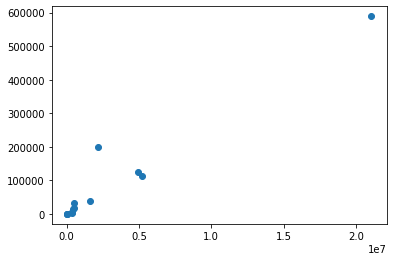

In [5]:
plt.scatter(TotalCases, TotalDeaths)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


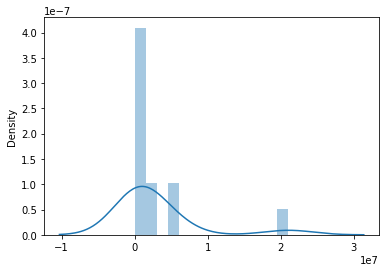

In [6]:
newdataset = newdataset.drop(newdataset.index[[13,14]])
sns.distplot(TotalCases, kde = True, rug = False, hist = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


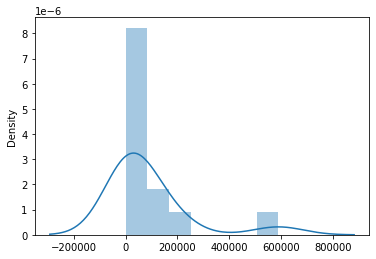

In [7]:
sns.distplot(TotalDeaths, kde = True, rug = False, hist = True)

# **b) Através das distribuições é possível identificar pontos influentes em alguma das variáveis? Comente.**



É possível verificar que há alguns pontos que estão ou muito distantes dos 
outro valores(Brazil - por ser muito grande em comaparação com os outros valores), ou fora de um comportamento linear(Peru e Ecuador - que fazem a reta se desviar do formato de uma reta)

# **c) Faça o gráfico xy do conjunto de dados. Visualmente, é possível identificar alguma correlação entre as variáveis?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


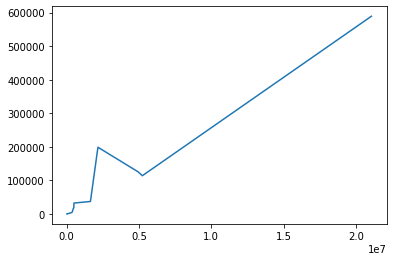

In [8]:
sns.lineplot(TotalCases,TotalDeaths)

Os valores de "Total Deaths" aparentemente tendem a aumentar conforme os valores de "Total Cases" aumentam.

# **d) Calcule o coeficiente de correlação e comente o resultado.**

In [9]:
medX = np.mean(TotalCases)
medY = np.mean(TotalDeaths)

num, denx, deny=0, 0, 0

for i in range(0,12):
  
  num = num + (TotalCases[i] - medX) * (TotalDeaths[i] - medY) 
  denx = denx + ((TotalCases[i] - medX) ** 2)
  deny = deny + ((TotalDeaths[i] - medY) ** 2)

  
den = math.sqrt(denx * deny)

result = num / den
print(result)

0.9674779430453133


Pelo valor ser bem próximo de 1 indica uma tendência de uma relação linear positiva, isto é, o conjunto de dados tem um comportamento quase linear fora alguns dados.

# **e) Encontre a reta de quadrados mínimos (estime β0(a) , β1(b) e σ2)**

In [10]:
'''
TotalCases = X
TotalDeaths = Y
a + bx
a = β0 e b = β1
'''
N = 13

XY, X2, aux, Ychapeu = [], [], [], []

for i in range(0, N-1):
  XY.append(TotalCases[i] * TotalDeaths[i])
  X2.append(TotalCases[i] ** 2)

#print(XY)

b = (sum(XY)-((1/N)*sum(TotalDeaths)*sum(TotalCases))) / (sum(X2) - (1/N)*(sum(TotalCases) ** 2))

a = (1/N)*sum(TotalDeaths) - (b/N)*sum(TotalCases)

#print(a,'\n',b)

for i in range(0, N):
  Ychapeu.append(b*TotalCases[i] + a)
  aux.append((TotalDeaths[i] - Ychapeu[i])**2)

σ2 = sum(aux)/(N-2)

#print(TotalDeaths, '\n')
#print(Ychapeu, '\n')
#print(aux, '\n')
#print(σ2, '\n')
#print(σ2**(1/2))

dataY = {'Y dado (Total Deaths)': TotalDeaths, 'Y calculado': Ychapeu}
display(pd.DataFrame(data = dataY))

print('β0 = ',a)
print('β1 = ',b)
print('σ2 = ',σ2)

,Y dado (Total Deaths),Y calculado
0,589277,586759.537650
1,114101,152775.624714
2,125782,144586.121130
3,198891,68619.943945
4,37293,54407.215729
5,32559,23163.113489
6,18616,22893.746987
7,16120,21893.133207
8,6046,19913.585430
9,4261,18947.615449


β0 =  9298.467747354545
β1 =  0.02740806891478242
σ2 =  1813399584.4123056


# **f) Faça o gráfico os dados no plano xy incluindo a reta de quadrados mínimos encontrada no item anterior.**

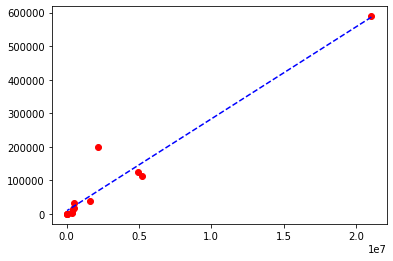

In [11]:
plt.scatter(TotalCases, TotalDeaths, color=(1.0, 0.0, 0.0))
plt.plot(TotalCases, Ychapeu,'--b')
plt.show()

# **g) Calcule os resíduos.**

In [12]:
residuos = []
for i in range(0, N):
  residuos.append(TotalDeaths[i]-Ychapeu[i])

display(pd.DataFrame(data = residuos, index = newdataset.loc[:,"Country, Other"], columns = ['Resíduos']))

,Resíduos
"Country, Other",
Brazil,2517.462350
Argentina,-38674.624714
Colombia,-18804.121130
Peru,130271.056055
Chile,-17114.215729
Ecuador,9395.886511
Bolivia,-4277.746987
Paraguay,-5773.133207
Uruguay,-13867.585430


# **h) Comente sobre os valores dos resíduos e os pontos influentes visualmente detectados no item b).**

Dos valores de resíduos encontrados, 3 sao positivos e os outros são negativos e esses 3 são Brazil, Peru e Ecuador, que são os pontos que podemos considerar candidatos à pontos influentes de acordo com o gráfico "scatter" de "Total Cases" e "Total Deaths" e por terem um valor mais alto do que os demais, pois eles fazem a reta deixar de ter um comportamento linear.

# **i) Monte a tabela ANOVA e, para o intervalo de confiança de 95%, verifique se a hipótese nula (modelo simples) é rejeitada (utilize a tabela da distribuição F do livro)**

In [13]:
pd.options.display.float_format = '{:.4f}'.format
SQT, SQreg = 0, 0
for i in range(0, N):
  SQT = SQT + (TotalDeaths[i] - medY)**2
  SQE = SQT - SQreg
  SQreg = SQreg + (b**2)*(TotalCases[i] - medX)**2

SQ = [SQreg,SQE,SQT]
GL = [1,N-2,N-1]
QM = [SQreg, (SQE/(N-2)),' ']
F0 = [(SQreg/(SQE/(N-2))),' ',' ']
FV = ['Regressão','Erro','Total']

dataANOVA = {'Graus de Liberdade (GL)': GL, 'Soma de Quadrados (SQ)': SQ, 'Quadrados Médios (QM)' : QM, 'Estatística do Teste (F0)' : F0, 'F Tabelado (Distribuição F -> 95%)' : [4.84,' ',' ']}

ANOVA = pd.DataFrame(data = dataANOVA, index = FV)
display(ANOVA)

,Graus de Liberdade (GL),Soma de Quadrados (SQ),Quadrados Médios (QM),Estatística do Teste (F0),F Tabelado (Distribuição F -> 95%)
Regressão,1,298021271693.1462,298021271693.1462,125.9626,4.8400
Erro,11,26025454512.5090,2365950410.2281,,
Total,12,317968529307.2308,,,


# **j) Retire os pontos classificados como influentes e repita os passos e) e f). Comente sobre os resultados.**

Após se retirar os pontos influentes Brazil, Peru e Ecuador com base nos resíduos e na analise visual, o novo gráfico do novo conjunto de dados passa a ser quase que totalmente linear.

,Y dado (Total Deaths),Y calculado,β0,β1,σ2
"Country, Other",,,,,
Argentina,114101,123119.3955,506.1023,0.0234,34748046.1507
Colombia,125782,116120.7762,,,
Chile,37293,39055.3199,,,
Bolivia,18616,12124.4114,,,
Paraguay,16120,11269.3028,,,
Uruguay,6046,9577.6128,,,
Venezuela,4261,8752.1102,,,
French Guiana,232,1396.6491,,,
Suriname,788,1345.0259,,,


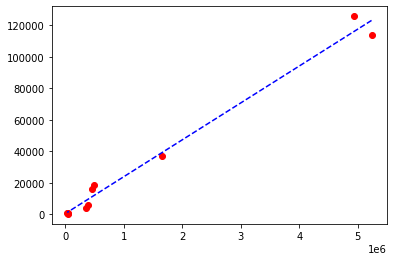

In [15]:
'''
TotalCases = X
TotalDeaths = Y
a + bx
a = β0 e b = β1
'''
N = 10

#Pontos Influentes => Brazil, Peru, Ecuador
teste1 = newdataset.drop(newdataset.index[[0,3,5]])

TotalCases = [5234851, 4936052, 1645820, 496032, 459524, 387299, 352055, 38021, 35817, 28831]
TotalDeaths = [114101, 125782, 37293, 18616, 16120, 6046, 4261, 232, 788, 703]

XY, X2, aux, Ychapeu = [], [], [], []

for i in range(0, N):
  XY.append(TotalCases[i] * TotalDeaths[i])
  X2.append(TotalCases[i] ** 2)

#print(XY)

b = (sum(XY)-((1/N)*sum(TotalDeaths)*sum(TotalCases))) / (sum(X2) - (1/N)*(sum(TotalCases) ** 2))

a = (1/N)*sum(TotalDeaths) - (b/N)*sum(TotalCases)

#print(a,'\n',b)

for i in range(0, N):
  Ychapeu.append(b*TotalCases[i] + a)
  aux.append((TotalDeaths[i] - Ychapeu[i])**2)

σ2 = sum(aux)/(N-2)

#print(TotalDeaths, '\n')
#print(Ychapeu, '\n')
#print(aux, '\n')
#print(σ2, '\n')
#print(σ2**(1/2))

la = [a,' ',' ',' ',' ',' ',' ',' ',' ',' ']
lb = [b,' ',' ',' ',' ',' ',' ',' ',' ',' ']
lσ2 = [σ2,' ',' ',' ',' ',' ',' ',' ',' ',' ']
dataY = {'Y dado (Total Deaths)': TotalDeaths, 'Y calculado': Ychapeu, 'β0' : la, 'β1' : lb, 'σ2' : lσ2}
display(pd.DataFrame(data = dataY, index = teste1.loc[:,"Country, Other"]))

#print('β0 = ',a)
#print('β1 = ',b)
#print('σ2 = ',σ2)

plt.scatter(TotalCases, TotalDeaths, color=(1.0, 0.0, 0.0))
plt.plot(TotalCases, Ychapeu,'--b')
plt.show()

,Y dado (Total Deaths),Y calculado,β0,β1,σ2
"Country, Other",,,,,
Colombia,125782,125184.4770,2371.0968,0.0249,66496073.1477
Chile,37293,43320.5676,,,
Ecuador,32559,14957.3452,,,
Bolivia,18616,14712.8158,,,
Paraguay,16120,13804.4642,,,
Uruguay,6046,12007.4417,,,
Venezuela,4261,11130.5395,,,
French Guiana,232,3317.0932,,,
Suriname,788,3262.2558,,,


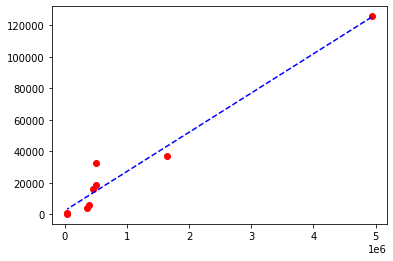

In [16]:
'''
TotalCases = X
TotalDeaths = Y
a + bx
a = β0 e b = β1
'''
N = 9

#Pontos Influentes => Brazil, Argentina, Peru, Guyana
teste2 = newdataset.drop(newdataset.index[[0,1,3,12]])

TotalCases = [4936052, 1645820, 505860, 496032, 459524, 387299, 352055, 38021, 35817]
TotalDeaths = [125782, 37293, 32559, 18616, 16120, 6046, 4261, 232, 788]

XY, X2, aux, Ychapeu = [], [], [], []

for i in range(0, N):
  XY.append(TotalCases[i] * TotalDeaths[i])
  X2.append(TotalCases[i] ** 2)

#print(XY)

b = (sum(XY)-((1/N)*sum(TotalDeaths)*sum(TotalCases))) / (sum(X2) - (1/N)*(sum(TotalCases) ** 2))

a = (1/N)*sum(TotalDeaths) - (b/N)*sum(TotalCases)

#print(a,'\n',b)

for i in range(0, N):
  Ychapeu.append(b*TotalCases[i] + a)
  aux.append((TotalDeaths[i] - Ychapeu[i])**2)

σ2 = sum(aux)/(N-2)

#print(TotalDeaths, '\n')
#print(Ychapeu, '\n')
#print(aux, '\n')
#print(σ2, '\n')
#print(σ2**(1/2))

la = [a,' ',' ',' ',' ',' ',' ',' ',' ']
lb = [b,' ',' ',' ',' ',' ',' ',' ',' ']
lσ2 = [σ2,' ',' ',' ',' ',' ',' ',' ',' ']
dataY = {'Y dado (Total Deaths)': TotalDeaths, 'Y calculado': Ychapeu, 'β0' : la, 'β1' : lb, 'σ2' : lσ2}
display(pd.DataFrame(data = dataY, index = teste2.loc[:,"Country, Other"]))

#print('β0 = ',a)
#print('β1 = ',b)
#print('σ2 = ',σ2)

plt.scatter(TotalCases, TotalDeaths, color=(1.0, 0.0, 0.0))
plt.plot(TotalCases, Ychapeu,'--b')
plt.show()